## Train designed CNNs models in Keras

## Description: Run training process for all developed models and all prepared datasets and Save trained models and trained weights

**File:** *training.ipynb*

### Algorithm:

**--> Step 1:** Load saved CNN model  
**--> Step 2:** Set up learning rate & epochs  
**--> Step 3: Train loaded model on all preprocessed datasets**  
**--> Step 4:** Show and plot results  


**Result:**  
- Binary files with saved weights  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback


## Setting up full paths

In [2]:
# Full or absolute path preprocessed datasets
full_path_to_code = \
    'C:/Users/yashs/PycharmProjects/InternshipCNN/TCS'


### Dataset, 1st model

## Loading saved 1st model

In [3]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for custom dataset
for i in range(2):
    model_rgb.append(load_model(full_path_to_code + '/' + 
                                'custom' + '/' + 
                                'model_1_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_code + '/' + 
                                 'custom' + '/' + 
                                 'model_1_custom_gray.h5'))

    
print('Models are successfully loaded')

Models are successfully loaded


In [4]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Dataset, 1st model

## Setting up learning rate & epochs

In [5]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


print('Number of epochs and schedule for learning rate are set successfully')

Number of epochs and schedule for learning rate are set successfully


### Dataset, 1st model

## Training

In [6]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 1st model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    with h5py.File(full_path_to_code + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 5)
    y_validation = to_categorical(y_validation, num_classes = 5)
    
    
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    best_weights_filepath = 'custom' + '/' + 'w_1' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'custom' + '/' + 'w_1' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    print('Schedule to save best weights is created:        ', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Training RGB model with current dataset
        temp = model_rgb[i].fit(x_train, y_train,
                                batch_size=50,
                                epochs=epochs,
                                validation_data=(x_validation, y_validation),
                                callbacks=[learning_rate, best_weights],
                                verbose=1)

        
        # Adding results of 1st model for current RGB dataset in the list
        h.append(temp)
        
        
        print('1st model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 1st model for current GRAY dataset in the list
        h.append(temp)
        
        
        print('1st model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()


Following dataset is successfully opened:         dataset_custom_rgb_255_mean.hdf5
Binary matrices are successfully created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save best weights is created:         dataset_custom_rgb_255_mean.hdf5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007694497527671316.
Epoch 1/50
65/65 [==============================] - ETA: 0s - loss: 1.5678 - accuracy: 0.3108
Epoch 00001: val_accuracy improved from -inf to 0.38559, saving model to custom\w_1_custom_rgb_255_mean.h5
65/65 [==============================] - 48s 734ms/step - loss: 1.5678 - accuracy: 0.3108 - val_loss: 1.3409 - val_accuracy: 0.3856

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007309772651287749.
Epoch 2/50
65/65 [==============================] - ETA: 0s - loss: 1.2854 - accuracy: 0.4349
Epoch 00002: val_accuracy improved from 0.38559 to 0.47838, saving model to custom\w_1_custom_rgb_255_mean.h5
65/65 [==============================] - 49s

65/65 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9651
Epoch 00042: val_accuracy did not improve from 0.68018
65/65 [==============================] - 54s 834ms/step - loss: 0.1064 - accuracy: 0.9651 - val_loss: 1.4262 - val_accuracy: 0.6775

Epoch 00043: LearningRateScheduler reducing learning rate to 8.924249150467202e-05.
Epoch 43/50
65/65 [==============================] - ETA: 0s - loss: 0.0958 - accuracy: 0.9667
Epoch 00043: val_accuracy did not improve from 0.68018
65/65 [==============================] - 53s 815ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 1.4045 - val_accuracy: 0.6712

Epoch 00044: LearningRateScheduler reducing learning rate to 8.478036692943841e-05.
Epoch 44/50
65/65 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 0.9698
Epoch 00044: val_accuracy did not improve from 0.68018
65/65 [==============================] - 53s 808ms/step - loss: 0.0921 - accuracy: 0.9698 - val_loss: 1.4664 - val_accuracy: 0.6


Epoch 00012: LearningRateScheduler reducing learning rate to 0.0004376630903760435.
Epoch 12/50
65/65 [==============================] - ETA: 0s - loss: 0.7244 - accuracy: 0.7052
Epoch 00012: val_accuracy improved from 0.64505 to 0.65766, saving model to custom\w_1_custom_rgb_255_mean_std.h5
65/65 [==============================] - 59s 904ms/step - loss: 0.7244 - accuracy: 0.7052 - val_loss: 0.8490 - val_accuracy: 0.6577

Epoch 00013: LearningRateScheduler reducing learning rate to 0.00041577993585724133.
Epoch 13/50
65/65 [==============================] - ETA: 0s - loss: 0.7129 - accuracy: 0.7062
Epoch 00013: val_accuracy did not improve from 0.65766
65/65 [==============================] - 58s 898ms/step - loss: 0.7129 - accuracy: 0.7062 - val_loss: 0.8573 - val_accuracy: 0.6568

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00039499093906437917.
Epoch 14/50
65/65 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.7343
Epoch 00014: val_accuracy


Epoch 00034: LearningRateScheduler reducing learning rate to 0.00014159869113351015.
Epoch 34/50
65/65 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9827
Epoch 00034: val_accuracy did not improve from 0.67748
65/65 [==============================] - 54s 828ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 1.5636 - val_accuracy: 0.6559

Epoch 00035: LearningRateScheduler reducing learning rate to 0.00013451875657683463.
Epoch 35/50
65/65 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9840
Epoch 00035: val_accuracy did not improve from 0.67748
65/65 [==============================] - 53s 818ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 1.5974 - val_accuracy: 0.6721

Epoch 00036: LearningRateScheduler reducing learning rate to 0.00012779281874799288.
Epoch 36/50
65/65 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9855
Epoch 00036: val_accuracy did not improve from 0.67748
65/65 [=====================

65/65 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.9139
Epoch 00025: val_accuracy did not improve from 0.67027
65/65 [==============================] - 49s 757ms/step - loss: 0.2470 - accuracy: 0.9139 - val_loss: 1.0940 - val_accuracy: 0.6450

Epoch 00026: LearningRateScheduler reducing learning rate to 0.0002134373384587751.
Epoch 26/50
65/65 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.9272
Epoch 00026: val_accuracy did not improve from 0.67027
65/65 [==============================] - 49s 757ms/step - loss: 0.2090 - accuracy: 0.9272 - val_loss: 1.1977 - val_accuracy: 0.6550

Epoch 00027: LearningRateScheduler reducing learning rate to 0.00020276547153583635.
Epoch 27/50
65/65 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9355
Epoch 00027: val_accuracy did not improve from 0.67027
65/65 [==============================] - 52s 797ms/step - loss: 0.1847 - accuracy: 0.9355 - val_loss: 1.2278 - val_accuracy: 0.


Epoch 00048: LearningRateScheduler reducing learning rate to 6.905413874132087e-05.
Epoch 48/50
65/65 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9895
Epoch 00048: val_accuracy did not improve from 0.67027
65/65 [==============================] - 49s 747ms/step - loss: 0.0362 - accuracy: 0.9895 - val_loss: 1.8161 - val_accuracy: 0.6432

Epoch 00049: LearningRateScheduler reducing learning rate to 6.560143180425483e-05.
Epoch 49/50
65/65 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9914
Epoch 00049: val_accuracy did not improve from 0.67027
65/65 [==============================] - 49s 747ms/step - loss: 0.0313 - accuracy: 0.9914 - val_loss: 1.8063 - val_accuracy: 0.6486

Epoch 00050: LearningRateScheduler reducing learning rate to 6.232136021404208e-05.
Epoch 50/50
65/65 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9944
Epoch 00050: val_accuracy did not improve from 0.67027
65/65 [========================


Epoch 00017: LearningRateScheduler reducing learning rate to 0.00033865535638032205.
Epoch 17/50
65/65 [==============================] - ETA: 0s - loss: 0.5491 - accuracy: 0.7799
Epoch 00017: val_accuracy did not improve from 0.66216
65/65 [==============================] - 48s 745ms/step - loss: 0.5491 - accuracy: 0.7799 - val_loss: 0.9442 - val_accuracy: 0.6315

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00032172258856130595.
Epoch 18/50
65/65 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.8049
Epoch 00018: val_accuracy did not improve from 0.66216
65/65 [==============================] - 48s 745ms/step - loss: 0.4990 - accuracy: 0.8049 - val_loss: 0.9940 - val_accuracy: 0.6144

Epoch 00019: LearningRateScheduler reducing learning rate to 0.0003056364591332406.
Epoch 19/50
65/65 [==============================] - ETA: 0s - loss: 0.4575 - accuracy: 0.8185
Epoch 00019: val_accuracy did not improve from 0.66216
65/65 [======================

### Dataset, 1st model

## Showing and plotting results

In [7]:
# Resulted accuracies of all custom datasets for 1st model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


T: 0.97685,  V: 0.68018,  D: custom_rgb_255_mean
T: 0.99537,  V: 0.67748,  D: custom_rgb_255_mean_std
T: 0.99444,  V: 0.67027,  D: custom_gray_255_mean
T: 0.99228,  V: 0.66216,  D: custom_gray_255_mean_std


In [8]:
# Showing other parameters that history holds
print(h[0].params)


{'verbose': 1, 'epochs': 50, 'steps': 65}


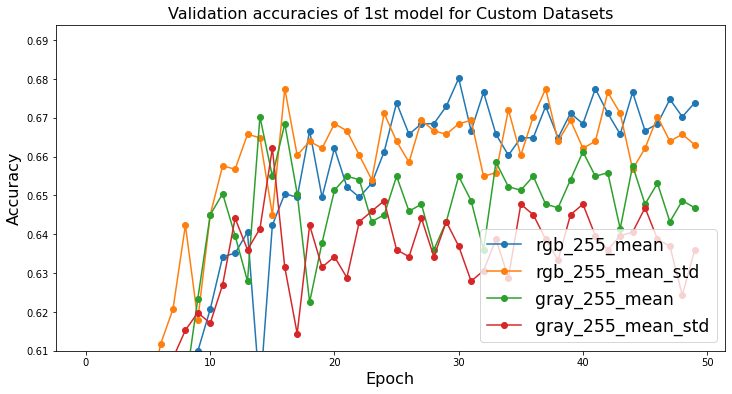

In [9]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all custom datasets for 1st model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.61, 0.694)


# Giving name to the plot
plt.title('Validation accuracies of 1st model for Custom Datasets', fontsize=16)


# Saving plot
plt.savefig('custom' + '/' + 'validation_model_1_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


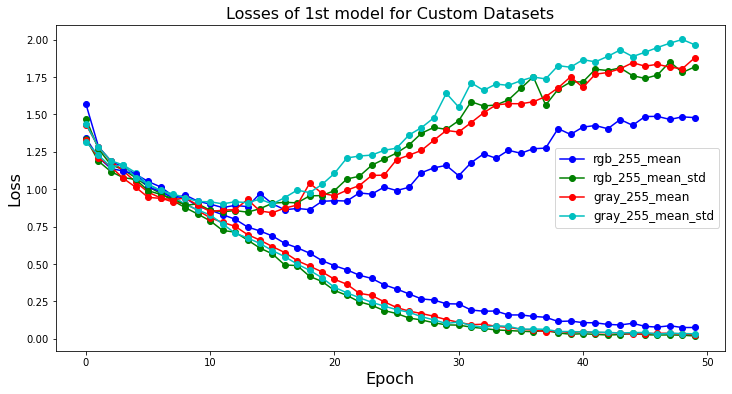

In [10]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all custom datasets for 1st model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='center right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 1st model for Custom Datasets', fontsize=16)


# Saving plot
plt.savefig('custom' + '/' + 'losses_model_1_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [11]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00076944975, 0.0007309773, 0.0006944284, 0.000659707, 0.00062672165, 0.00059538556, 0.0005656163, 0.00053733547, 0.0005104687, 0.00048494525, 0.00046069798, 0.00043766308, 0.00041577994, 0.00039499093, 0.0003752414, 0.00035647932, 0.00033865534, 0.0003217226, 0.00030563647, 0.00029035463, 0.0002758369, 0.00026204507, 0.00024894282, 0.00023649566, 0.00022467088, 0.00021343734, 0.00020276547, 0.0001926272, 0.00018299583, 0.00017384604, 0.00016515375, 0.00015689606, 0.00014905125, 0.00014159869, 0.00013451876, 0.00012779282, 0.00012140318, 0.000115333016, 0.00010956637, 0.00010408805, 9.888365e-05, 9.393947e-05, 8.9242494e-05, 8.478037e-05, 8.054135e-05, 7.651428e-05, 7.268857e-05, 6.905414e-05, 6.560143e-05, 6.2321364e-05]


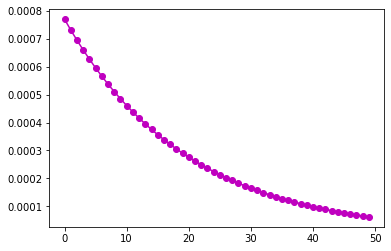

In [12]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### Dataset, 2nd model

## Loading saved 2nd model

In [13]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for custom dataset
for i in range(2):
    model_rgb.append(load_model(full_path_to_code + '/' + 
                                'custom' + '/' + 
                                'model_2_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_code + '/' + 
                                 'custom' + '/' + 
                                 'model_2_custom_gray.h5'))


print('Models are successfully loaded')


Models are successfully loaded


In [14]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Dataset, 2nd model

## Setting up learning rate & epochs

In [15]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### Dataset, 2nd model

## Training

In [16]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 2nd model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    with h5py.File(full_path_to_code + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    y_train = to_categorical(y_train, num_classes = 5)
    y_validation = to_categorical(y_validation, num_classes = 5)
    
    
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    best_weights_filepath = 'custom' + '/' + 'w_2' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'custom' + '/' + 'w_2' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    print('Schedule to save best weights is created:        ', datasets[i])
    
    
    # Defining schedule to save intermediate weights
    class CustomCallback(Callback):
        # Constructor of the class
        def __init__(self):
            # Defining variable to be as a part of filename
            self.filename = 0
        
        # Function that is called at the end of every batch
        def on_train_batch_end(self, batch, logs=None):
            # Checking if it is every 10th batch
            if batch % 10 == 0:
                # Preparing filepath to save intermediate weights
                intermediate_weights_filepath = 'custom' + '/' + \
                                                'intermediate' + '/' + \
                                                '{0:04d}'.format(self.filename) + \
                                                '_w_2' + \
                                                datasets[i][7:-5] + '.h5'
                
                # Getting weights only for the first convolutional layer
                weights_layer_0 = self.model.get_weights()[0]
                
                # Saving obtained weights into new HDF5 binary file
                # Initiating File object
                # Creating file with current name
                # Opening it in writing mode by 'w'
                with h5py.File(intermediate_weights_filepath, 'w') as f:
                    # Calling method to create dataset of given shape and type
                    # Saving Numpy array with weights from the first layer
                    f.create_dataset('weights_layer_0', data=weights_layer_0, dtype='f')
                    
                # Increasing variable to be as a part of the next filename
                self.filename += 1
    
    
    print('Schedule to save intermediate weights is created:', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Checking if second RGB dataset is opened
        if i == 1:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights, CustomCallback()],
                                    verbose=1)
        
        # Checking if first RGB dataset is opened
        else:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights],
                                    verbose=1)

        
        # Adding results of 2nd model for current RGB dataset in the list
        h.append(temp)
        
        
        print('2nd model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 2nd model for current GRAY dataset in the list
        h.append(temp)
        
        
        print('2nd model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()


Following dataset is successfully opened:         dataset_custom_rgb_255_mean.hdf5
Binary matrices are successfully created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save best weights is created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save intermediate weights is created: dataset_custom_rgb_255_mean.hdf5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007694497527671316.
Epoch 1/50
65/65 [==============================] - ETA: 0s - loss: 1.7002 - accuracy: 0.3997
Epoch 00001: val_accuracy improved from -inf to 0.48018, saving model to custom\w_2_custom_rgb_255_mean.h5
65/65 [==============================] - 84s 1s/step - loss: 1.7002 - accuracy: 0.3997 - val_loss: 1.2182 - val_accuracy: 0.4802

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007309772651287749.
Epoch 2/50
65/65 [==============================] - ETA: 0s - loss: 1.1949 - accuracy: 0.4889
Epoch 00002: val_accuracy improved from 0.48018 to 0.51532, saving model t


Epoch 00021: LearningRateScheduler reducing learning rate to 0.00027583690436774964.
Epoch 21/50
65/65 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8105
Epoch 00021: val_accuracy did not improve from 0.59279
65/65 [==============================] - 83s 1s/step - loss: 0.4446 - accuracy: 0.8105 - val_loss: 1.2924 - val_accuracy: 0.5766

Epoch 00022: LearningRateScheduler reducing learning rate to 0.0002620450591493622.
Epoch 22/50
65/65 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8191
Epoch 00022: val_accuracy did not improve from 0.59279
65/65 [==============================] - 83s 1s/step - loss: 0.4376 - accuracy: 0.8191 - val_loss: 1.4094 - val_accuracy: 0.5784

Epoch 00023: LearningRateScheduler reducing learning rate to 0.00024894280619189405.
Epoch 23/50
65/65 [==============================] - ETA: 0s - loss: 0.4045 - accuracy: 0.8358
Epoch 00023: val_accuracy did not improve from 0.59279
65/65 [============================


Epoch 00013: LearningRateScheduler reducing learning rate to 0.00041577993585724133.
Epoch 13/50
65/65 [==============================] - ETA: 0s - loss: 1.0460 - accuracy: 0.5361
Epoch 00013: val_accuracy did not improve from 0.54234
65/65 [==============================] - 85s 1s/step - loss: 1.0460 - accuracy: 0.5361 - val_loss: 1.0887 - val_accuracy: 0.5396

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00039499093906437917.
Epoch 14/50
65/65 [==============================] - ETA: 0s - loss: 1.0105 - accuracy: 0.5522
Epoch 00014: val_accuracy improved from 0.54234 to 0.54775, saving model to custom\w_2_custom_rgb_255_mean_std.h5
65/65 [==============================] - 84s 1s/step - loss: 1.0105 - accuracy: 0.5522 - val_loss: 1.0917 - val_accuracy: 0.5477

Epoch 00015: LearningRateScheduler reducing learning rate to 0.00037524139211116017.
Epoch 15/50
65/65 [==============================] - ETA: 0s - loss: 0.9894 - accuracy: 0.5596
Epoch 00015: val_accuracy did 


Epoch 00005: LearningRateScheduler reducing learning rate to 0.0006267216326897833.
Epoch 5/50
65/65 [==============================] - ETA: 0s - loss: 1.0895 - accuracy: 0.5358
Epoch 00005: val_accuracy improved from 0.51892 to 0.52252, saving model to custom\w_2_custom_gray_255_mean.h5
65/65 [==============================] - 47s 716ms/step - loss: 1.0895 - accuracy: 0.5358 - val_loss: 1.1390 - val_accuracy: 0.5225

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0005953855510552941.
Epoch 6/50
65/65 [==============================] - ETA: 0s - loss: 1.0396 - accuracy: 0.5577
Epoch 00006: val_accuracy improved from 0.52252 to 0.53243, saving model to custom\w_2_custom_gray_255_mean.h5
65/65 [==============================] - 47s 717ms/step - loss: 1.0396 - accuracy: 0.5577 - val_loss: 1.1275 - val_accuracy: 0.5324

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0005656162735025293.
Epoch 7/50
65/65 [==============================] - ETA: 0s - loss: 1.0


Epoch 00027: LearningRateScheduler reducing learning rate to 0.00020276547153583635.
Epoch 27/50
65/65 [==============================] - ETA: 0s - loss: 0.3968 - accuracy: 0.8441
Epoch 00027: val_accuracy did not improve from 0.57027
65/65 [==============================] - 47s 717ms/step - loss: 0.3968 - accuracy: 0.8441 - val_loss: 1.5354 - val_accuracy: 0.5351

Epoch 00028: LearningRateScheduler reducing learning rate to 0.0001926271979590445.
Epoch 28/50
65/65 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.8534
Epoch 00028: val_accuracy did not improve from 0.57027
65/65 [==============================] - 47s 717ms/step - loss: 0.3776 - accuracy: 0.8534 - val_loss: 1.5899 - val_accuracy: 0.5423

Epoch 00029: LearningRateScheduler reducing learning rate to 0.0001829958380610923.
Epoch 29/50
65/65 [==============================] - ETA: 0s - loss: 0.3784 - accuracy: 0.8506
Epoch 00029: val_accuracy did not improve from 0.57027
65/65 [=======================

65/65 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.6824
Epoch 00019: val_accuracy did not improve from 0.57207
65/65 [==============================] - 47s 717ms/step - loss: 0.7006 - accuracy: 0.6824 - val_loss: 1.2545 - val_accuracy: 0.5405

Epoch 00020: LearningRateScheduler reducing learning rate to 0.0002903546361765786.
Epoch 20/50
65/65 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.6932
Epoch 00020: val_accuracy did not improve from 0.57207
65/65 [==============================] - 47s 716ms/step - loss: 0.6907 - accuracy: 0.6932 - val_loss: 1.3172 - val_accuracy: 0.5640

Epoch 00021: LearningRateScheduler reducing learning rate to 0.00027583690436774964.
Epoch 21/50
65/65 [==============================] - ETA: 0s - loss: 0.6615 - accuracy: 0.7037
Epoch 00021: val_accuracy did not improve from 0.57207
65/65 [==============================] - 47s 717ms/step - loss: 0.6615 - accuracy: 0.7037 - val_loss: 1.3294 - val_accuracy: 0.

### Dataset, 2nd model

## Showing and plotting results

In [17]:
# Resulted accuracies of all custom datasets for 2nd model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


T: 0.93395,  V: 0.59279,  D: custom_rgb_255_mean
T: 0.77284,  V: 0.59279,  D: custom_rgb_255_mean_std
T: 0.91235,  V: 0.57027,  D: custom_gray_255_mean
T: 0.85864,  V: 0.57387,  D: custom_gray_255_mean_std


In [18]:
# Showing other parameters that history holds
print(h[0].params)


{'verbose': 1, 'epochs': 50, 'steps': 65}


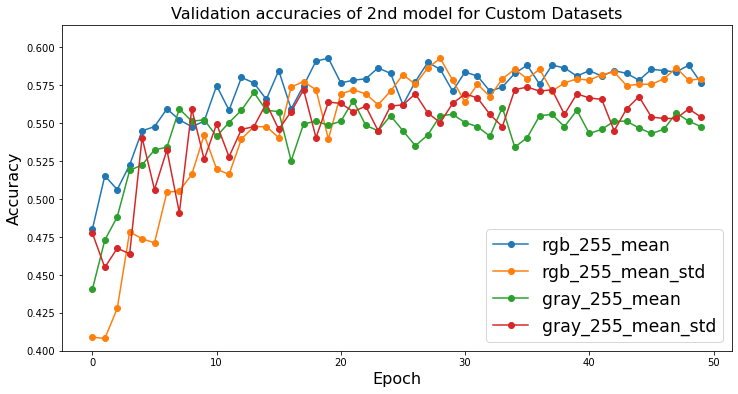

In [19]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all custom datasets for 2nd model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.4, 0.615)


# Giving name to the plot
plt.title('Validation accuracies of 2nd model for Custom Datasets', fontsize=16)


# Saving plot
plt.savefig('custom' + '/' + 'validation_model_2_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


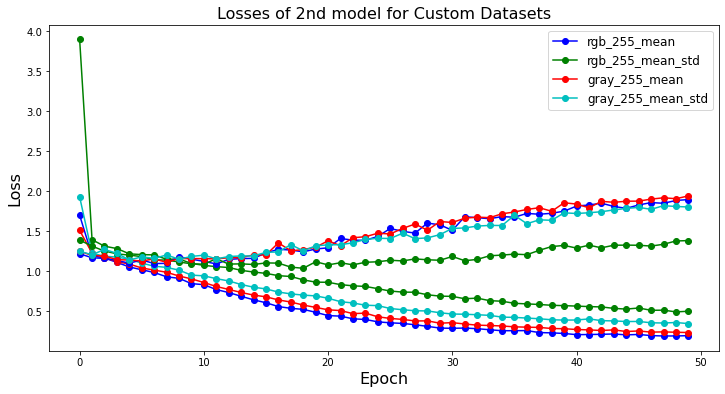

In [20]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all custom datasets for 2nd model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='upper right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 2nd model for Custom Datasets', fontsize=16)


# Saving plot
plt.savefig('custom' + '/' + 'losses_model_2_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [21]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00076944975, 0.0007309773, 0.0006944284, 0.000659707, 0.00062672165, 0.00059538556, 0.0005656163, 0.00053733547, 0.0005104687, 0.00048494525, 0.00046069798, 0.00043766308, 0.00041577994, 0.00039499093, 0.0003752414, 0.00035647932, 0.00033865534, 0.0003217226, 0.00030563647, 0.00029035463, 0.0002758369, 0.00026204507, 0.00024894282, 0.00023649566, 0.00022467088, 0.00021343734, 0.00020276547, 0.0001926272, 0.00018299583, 0.00017384604, 0.00016515375, 0.00015689606, 0.00014905125, 0.00014159869, 0.00013451876, 0.00012779282, 0.00012140318, 0.000115333016, 0.00010956637, 0.00010408805, 9.888365e-05, 9.393947e-05, 8.9242494e-05, 8.478037e-05, 8.054135e-05, 7.651428e-05, 7.268857e-05, 6.905414e-05, 6.560143e-05, 6.2321364e-05]


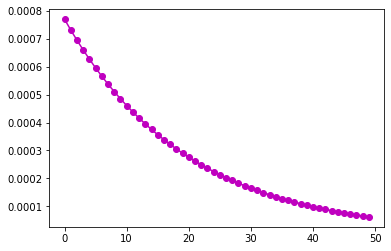

In [22]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()
